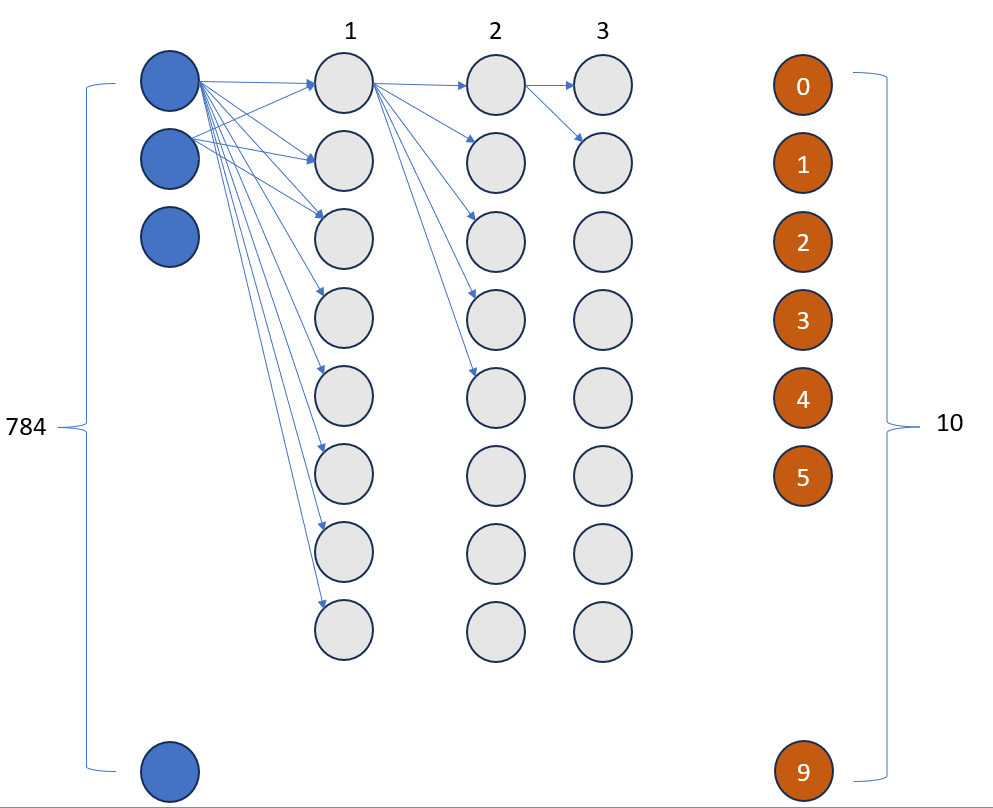

In [ ]:
#---- Packages

# Assuming that packages are already installed:
# using Pkg
# Pkg.add("Images") ...

using Images
using FileIO
using MLDatasets
using Flux
using ImageShow
using ImageInTerminal
using ImageIO
using ImageMagick
using LinearAlgebra
using Random


#---- Functions
function img_to_FloatVector(img_path,scale)
    '''
    '''
    
    img = load(img_path)

    gray_img = Gray.(img)
    resized_img = imresize(gray_img, (scale,scale))
    single_img = 1 .-float.(resized_img)
    single_data = 1 .-reshape(Float64.(resized_img),(scale*scale,1))

    return single_img, single_data
end

function load_MNIST()
    """
    Loading the MNIST dataset.
    X: Grayscale vector, Y: Label (assuming that the label is correct).
    """
    
    X_training, Y_training = MNIST(split = :train)[:] 
    X_testing, Y_testing = MNIST(split = :test)[:]

    X_training = Flux.flatten(X_training)
    X_testing = Flux.flatten(X_testing)
    Y_training = Flux.onehotbatch(Y_training,0:9)
    Y_testing = Flux.onehotbatch(Y_testing,0:9)

    return X_training,Y_training,X_testing,Y_testing

end

function model_4LS(scale)
    """
    4LS: A 4-layer model using 16 nodes in the inner layers and the sigmoid activation function
    """

    m_4LS = Chain(
        Dense(scale*scale,16,sigmoid), # Input Layer -> Hidden Layer 1
        Dense(16,16,sigmoid), # Hidden Layer 1 -> Hidden Layer 2
        Dense(16,16,sigmoid), # Hidden Layer 2 -> Hidden Layer 3
        Dense(16,10,sigmoid) # Hidden Layer 3 -> Output Layer
        )

    params_4LS = Flux.params(m_4LS) # The parameters
    
    return m_4LS,params_4LS
end

function model_3LS(scale)
    """
    A 3-layer model using 60 nodes in the inner layers and the sigmoid activation function
    """

    m_3LS = Chain(
        Dense(scale*scale,60,sigmoid), # Input Layer -> Hidden Layer 1
        Dense(60,60,sigmoid), # Hidden Layer 1 -> Hidden Layer 2
        Dense(60,10,sigmoid)
    )

    param_3LS = Flux.params(m_3LS) # The parameters

    return m_3LS,param_3LS
end

function loss_of(model_4LS,model_3LS)
    """
    For a loss function we use MSE(mean squared error)
    """
    
    loss_4LS(X_LS4,Y_LS4) =  Flux.Losses.mse(model_4LS(X_LS4),Y_LS4)
    loss_3LS(X_LS3,Y_LS3) =  Flux.Losses.mse(model_3LS(X_LS3),Y_LS3) 

    return loss_4LS,loss_3LS

end

function train_batch(X,Y,loss,opt,params,epochs)
    """
    In: data, loss, optimizer, parameters, iteration(epochs)
    Out: trained model
    """
    
    data = [(X,Y)]
    for epoch in 1:epochs
        Flux.train!(loss,params,data,opt)
    end
    
end
   
function predict_digit(model, single_data)
    """
    Predicts the digit from the given image data using the specified model.
    """
    
    # Forward pass through the model
    prediction = vec(model(single_data))

    # Find the index of the maximum value in the prediction
    digit = argmax(prediction) - 1 # Adjusting for Julia's 1-indexing

    return digit
end

function compute_accuracy(model, X, Y)
    """
    Computes the accuracy of the model.
    X: Input data
    Y: True labels
    """

    # Count the number of correct predictions
    correct = 0
    total = size(X, 2)

    for i in 1:total
        # Predict the digit for each image in the dataset
        predicted_digit = argmax(vec(model(X[:, i]))) - 1 # Adjust for Julia's 1-indexing
        true_digit = argmax(Y[:, i]) - 1

        # Increment correct count if prediction matches the true label
        correct += (predicted_digit == true_digit)
    end

    # Calculate accuracy
    accuracy = correct / total

    return accuracy
end

#---- Main

# Data
X_training,Y_training,X_testing,Y_testing = load_MNIST()
img_path = "C:\\UROP\\mnist_png\\testing\\8\\61.png" # Change to your liking
scale = 28 # 28x28 scale
single_img,single_data = img_to_FloatVector(img_path,scale)

# Model
m_4LS,params_4LS = model_4LS(scale)
m_3LS,params_3LS = model_3LS(scale)

# Loss
loss_4LS,loss_3LS = loss_of(m_4LS,m_3LS)

# Training
epochs = 500 # Iterations
lr = 0.1 # Learning rate
training_4LS = train_batch(X_training,Y_training,loss_4LS,Descent(lr),params_4LS,epochs)
training_3LS = train_batch(X_training,Y_training,loss_3LS,Descent(lr),params_3LS,epochs)

# Loss update
loss_update_4LS = loss_4LS(X_training,Y_training)
loss_update_3LS = loss_3LS(X_training,Y_training)


# Testing

println("4LS vs 3LS: $loss_update_4LS vs $loss_update_3LS")

# # display(single_img)
predicted_digit = predict_digit(m_3LS, single_data)
println("Predicted digit: $predicted_digit")

Compute accuracy for both models
accuracy_4LS = compute_accuracy(m_4LS, X_testing, Y_testing)
accuracy_3LS = compute_accuracy(m_4LS, X_testing, Y_testing)

println("Accuracy of 4LS model: $accuracy_4LS")
println("Accuracy of 3LS model: $accuracy_3LS")




    